In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import nltk

In [2]:
from nltk.stem import WordNetLemmatizer
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [3]:
reddit_train = pd.read_csv('reddit_train.csv', index_col=0)
#reddit_train = reddit_train.drop(0, axis=1) # Removes the id's column

In [4]:
reddit_train.head()

,comments,subreddits
id,,
0,"Honestly, Buffalo is the correct answer. I rem...",hockey
1,Ah yes way could have been :( remember when he...,nba
2,https://youtu.be/6xxbBR8iSZ0?t=40m49s\n\nIf yo...,leagueoflegends
3,He wouldn't have been a bad signing if we woul...,soccer
4,Easy. You use the piss and dry technique. Let ...,funny


In [5]:
from nltk import WordPunctTokenizer
tok = WordPunctTokenizer()
import re

negations_dict = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dict.keys()) + r')\b')
neg_pattern

re.compile(r"\b(isn't|aren't|wasn't|weren't|haven't|hasn't|hadn't|won't|wouldn't|don't|doesn't|didn't|can't|couldn't|shouldn't|mightn't|mustn't)\b",
re.UNICODE)

In [6]:
def comment_cleaner(text):
    letters = re.sub("[^a-zA-Z]"," ",str(text))
    lower_case = letters.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dict[x.group()],lower_case)
    
    #remove unnecessary white spaces by tokenizing and joining back
    words = tok.tokenize(neg_handled)
    
    #Lemmatization
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in words]) # Very expensive
    return lemmatized_output.strip() 

In [7]:
reddit_train.dropna(inplace=True)
reddit_train.reset_index(drop=True,inplace=True)
reddit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
comments      70000 non-null object
subreddits    70000 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


In [8]:
reddit_train.head()

,comments,subreddits
0,"Honestly, Buffalo is the correct answer. I rem...",hockey
1,Ah yes way could have been :( remember when he...,nba
2,https://youtu.be/6xxbBR8iSZ0?t=40m49s\n\nIf yo...,leagueoflegends
3,He wouldn't have been a bad signing if we woul...,soccer
4,Easy. You use the piss and dry technique. Let ...,funny


In [9]:
%%time
#Cleaning the data
print("Cleaning and parsing  comments")
clean_comments = []
for x in reddit_train['comments']:
    clean_comments.append(comment_cleaner(x))

Cleaning and parsing  comments
Wall time: 23.5 s


In [10]:
#Create a column of clean comments
reddit_train['clean_comments'] = clean_comments 

In [11]:
reddit_train.head()

,comments,subreddits,clean_comments
0,"Honestly, Buffalo is the correct answer. I rem...",hockey,honestly buffalo is the correct answer i remem...
1,Ah yes way could have been :( remember when he...,nba,ah yes way could have been remember when he wa...
2,https://youtu.be/6xxbBR8iSZ0?t=40m49s\n\nIf yo...,leagueoflegends,http youtu be xxbbr isz t m s if you didn t fi...
3,He wouldn't have been a bad signing if we woul...,soccer,he wouldn t have been a bad signing if we woul...
4,Easy. You use the piss and dry technique. Let ...,funny,easy you use the piss and dry technique let a ...


In [12]:
#Drops the raw comments column
reddit_train.drop('comments',1,inplace=True)

In [13]:
reddit_train.head()

,subreddits,clean_comments
0,hockey,honestly buffalo is the correct answer i remem...
1,nba,ah yes way could have been remember when he wa...
2,leagueoflegends,http youtu be xxbbr isz t m s if you didn t fi...
3,soccer,he wouldn t have been a bad signing if we woul...
4,funny,easy you use the piss and dry technique let a ...


In [14]:
reddit_train['subreddit-id'] = reddit_train['subreddits'].factorize()[0]

In [15]:
reddit_train.head()

,subreddits,clean_comments,subreddit-id
0,hockey,honestly buffalo is the correct answer i remem...,0
1,nba,ah yes way could have been remember when he wa...,1
2,leagueoflegends,http youtu be xxbbr isz t m s if you didn t fi...,2
3,soccer,he wouldn t have been a bad signing if we woul...,3
4,funny,easy you use the piss and dry technique let a ...,4


In [16]:
reddit_train.rename(columns={'clean_comments':'comments'},inplace=True)

In [17]:
print(reddit_train['subreddit-id'][185])

18


In [18]:
subreddit_id_df = reddit_train[['subreddits','subreddit-id']].drop_duplicates().sort_values('subreddit-id')

In [19]:
subreddit_id_df.head()

,subreddits,subreddit-id
0,hockey,0
1,nba,1
2,leagueoflegends,2
3,soccer,3
4,funny,4


In [20]:
subreddit_to_id = dict(subreddit_id_df.values)
subreddit_to_id

{'hockey': 0,
 'nba': 1,
 'leagueoflegends': 2,
 'soccer': 3,
 'funny': 4,
 'movies': 5,
 'anime': 6,
 'Overwatch': 7,
 'trees': 8,
 'GlobalOffensive': 9,
 'nfl': 10,
 'AskReddit': 11,
 'gameofthrones': 12,
 'conspiracy': 13,
 'worldnews': 14,
 'wow': 15,
 'europe': 16,
 'canada': 17,
 'Music': 18,
 'baseball': 19}

In [21]:
reddit_train.shape

(70000, 3)

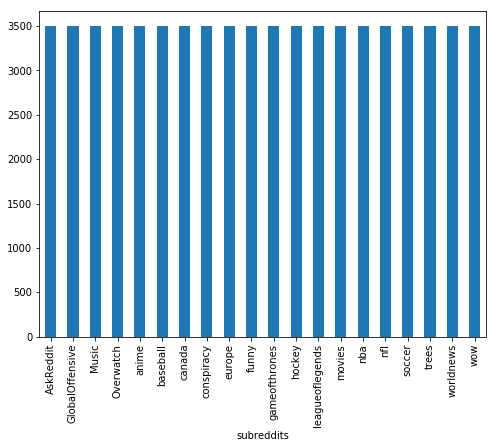

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,6))
reddit_train.groupby('subreddits').comments.count().plot.bar(ylim=0)
plt.show()

In [23]:
reddit_train = reddit_train[['subreddit-id','subreddits','comments']] # Arrange the columns properly

In [24]:
reddit_train.head()

,subreddit-id,subreddits,comments
0,0,hockey,honestly buffalo is the correct answer i remem...
1,1,nba,ah yes way could have been remember when he wa...
2,2,leagueoflegends,http youtu be xxbbr isz t m s if you didn t fi...
3,3,soccer,he wouldn t have been a bad signing if we woul...
4,4,funny,easy you use the piss and dry technique let a ...


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reddit_train['comments'], reddit_train['subreddit-id'], train_size=0.8, test_size=0.2)
print(y_train)

27807     4
3782     16
67184    18
46542    11
57722     2
         ..
51297     1
478       6
50020     0
30881    11
29668    13
Name: subreddit-id, Length: 56000, dtype: int64


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#print(vectorizer)

In [27]:
vectors_train = vectorizer.fit_transform(X_train)

In [28]:
vectors_test = vectorizer.transform(X_test)

In [29]:
#print(vectorizer.vocabulary_)
print(vectors_train)

  (0, 45495)	1
  (0, 16811)	1
  (0, 29922)	1
  (0, 29024)	1
  (0, 17731)	1
  (0, 31675)	1
  (0, 44993)	1
  (0, 20574)	1
  (0, 48763)	1
  (0, 28427)	1
  (1, 39410)	1
  (1, 31217)	1
  (1, 53244)	1
  (1, 13230)	1
  (1, 323)	1
  (1, 4216)	2
  (1, 55060)	1
  (1, 2077)	1
  (1, 28831)	1
  (1, 48609)	1
  (1, 2779)	1
  (1, 42413)	1
  (1, 4028)	1
  (1, 50976)	1
  (1, 42367)	1
  :	:
  (55998, 47258)	1
  (55998, 33824)	1
  (55998, 49196)	1
  (55998, 17731)	1
  (55999, 32949)	1
  (55999, 9076)	1
  (55999, 33735)	1
  (55999, 24378)	1
  (55999, 23480)	1
  (55999, 9104)	1
  (55999, 15846)	1
  (55999, 54885)	1
  (55999, 9127)	1
  (55999, 21579)	1
  (55999, 39442)	1
  (55999, 52868)	1
  (55999, 54825)	1
  (55999, 31488)	1
  (55999, 24553)	2
  (55999, 23375)	1
  (55999, 48546)	1
  (55999, 33824)	1
  (55999, 53577)	1
  (55999, 24646)	1
  (55999, 48529)	1


In [30]:
#print(vectors_train_normalized)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tf_idf_vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=0, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tf_idf_vectorizer = TfidfVectorizer()
X_train_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_idf = tf_idf_vectorizer.transform(X_test)
print(X_train_idf)

  (0, 28427)	0.3485410994480327
  (0, 48763)	0.19423677243162485
  (0, 20574)	0.31899615379975854
  (0, 44993)	0.22105255920756162
  (0, 31675)	0.286651606319016
  (0, 17731)	0.17597683096888134
  (0, 29024)	0.3783802855340662
  (0, 29922)	0.2608198460663436
  (0, 16811)	0.3407111165789659
  (0, 45495)	0.4997486489958019
  (1, 48763)	0.022110173006150473
  (1, 20574)	0.0726233252387064
  (1, 44993)	0.050325283584003205
  (1, 17731)	0.04006324990975362
  (1, 29922)	0.059378786496201784
  (1, 16811)	0.03878349932596551
  (1, 48529)	0.1538270855867395
  (1, 14378)	0.04495214721065771
  (1, 48819)	0.03663616414990504
  (1, 18221)	0.027789756734451374
  (1, 53722)	0.09257988832160326
  (1, 48469)	0.07088844207026403
  (1, 9119)	0.08002413033856817
  (1, 49196)	0.11671696269507463
  (1, 34143)	0.062116173937355704
  :	:
  (55998, 19427)	0.2927804892611436
  (55998, 45439)	0.3037373525545786
  (55998, 44642)	0.3037373525545786
  (55998, 18859)	0.3037373525545786
  (55999, 48529)	0.07337550358

In [32]:
from sklearn.preprocessing import normalize

#l2 regularization. It ensures that the learner learns from the data on similar scales across features
vectors_train_normalized = normalize(X_train_idf)
vectors_test_normalized = normalize(X_test_idf)
print(vectors_train_normalized)

  (0, 28427)	0.3485410994480327
  (0, 48763)	0.19423677243162485
  (0, 20574)	0.31899615379975854
  (0, 44993)	0.22105255920756162
  (0, 31675)	0.286651606319016
  (0, 17731)	0.17597683096888134
  (0, 29024)	0.3783802855340662
  (0, 29922)	0.2608198460663436
  (0, 16811)	0.3407111165789659
  (0, 45495)	0.4997486489958019
  (1, 48763)	0.022110173006150476
  (1, 20574)	0.07262332523870642
  (1, 44993)	0.05032528358400321
  (1, 17731)	0.04006324990975363
  (1, 29922)	0.05937878649620179
  (1, 16811)	0.03878349932596552
  (1, 48529)	0.15382708558673952
  (1, 14378)	0.04495214721065772
  (1, 48819)	0.036636164149905046
  (1, 18221)	0.027789756734451377
  (1, 53722)	0.09257988832160327
  (1, 48469)	0.07088844207026404
  (1, 9119)	0.08002413033856819
  (1, 49196)	0.11671696269507464
  (1, 34143)	0.06211617393735571
  :	:
  (55998, 19427)	0.2927804892611436
  (55998, 45439)	0.3037373525545786
  (55998, 44642)	0.3037373525545786
  (55998, 18859)	0.3037373525545786
  (55999, 48529)	0.07337550358

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
clf_multNB = MultinomialNB().fit(X_train_idf, y_train)

In [35]:
y_pred = clf_multNB.predict(X_test_idf)
print(y_pred)

[ 1  7  0 ...  8  5 18]


In [36]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.5609285714285714

In [37]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()

In [38]:
clf_log.fit(vectors_train_normalized, y_train) # "Fit to learn parameters"

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
clf_y_pred = clf_log.predict(vectors_test_normalized)

In [40]:
metrics.accuracy_score(y_test, clf_y_pred)

0.5482857142857143

In [43]:
from sklearn.ensemble import VotingClassifier

estimators = [('multi_bin', clf_multNB), ('log_reg', clf_log)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

C:\Users\Ambutu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
#fit model to training data
ensemble.fit(X_train_idf, y_train)

VotingClassifier(estimators=[('multi_bin', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [46]:
ensemble.score(X_test_idf, y_test)

C:\Users\Ambutu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5569285714285714